## Goal of the project.
* Build a deep learning algorithm to classify unstructured medical abstract to structured format hence allowing researcher to read through abstract of  medical papers easily and find papers of interest. This may reduce the time required to locate relevant information.

* I will be replicating the deep learning model behind the 2017 paper PubMed 200k RCT: a Dataset for Sequenctial Sentence Classification in Medical Abstracts. https://arxiv.org/abs/1710.06071

## Data Sources

Where our data is gotten from: PubMed 200k RCT: https://arxiv.org/abs/1710.06071

## Model Input
For example, can we train an NLP model which takes the following input (note: the following sample has had all numerical symbols replaced with "@")

To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ). A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks. Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers. Pain was assessed using the visual analog pain scale ( @-@ mm ). Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD )., Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured. There was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks. The mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively. Further , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group. These differences remained significant at @ weeks. The Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ). Low-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ).


## Model output
And returns the following output:

```
['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .\n',
 'RESULTS\tThere was a clinically relevant reduction in the intervention group compared to the placebo group for knee pain , physical function , PGA , and @MWD at @ weeks .\n',
 'RESULTS\tThe mean difference between treatment arms ( @ % CI ) was @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; @ ( @-@ @ ) , p < @ ; and @ ( @-@ @ ) , p < @ , respectively .\n',
 'RESULTS\tFurther , there was a clinically relevant reduction in the serum levels of IL-@ , IL-@ , TNF - , and hsCRP at @ weeks in the intervention group when compared to the placebo group .\n',
 'RESULTS\tThese differences remained significant at @ weeks .\n',
 'RESULTS\tThe Outcome Measures in Rheumatology Clinical Trials-Osteoarthritis Research Society International responder rate was @ % in the intervention group and @ % in the placebo group ( p < @ ) .\n',
 'CONCLUSIONS\tLow-dose oral prednisolone had both a short-term and a longer sustained effect resulting in less knee pain , better physical function , and attenuation of systemic inflammation in older patients with knee OA ( ClinicalTrials.gov identifier NCT@ ) .\n',
 '\n']
 ```

### Problem we are trying to solve

There are large number of medical research papers published daily, those without structure  makes it hard for researcher to skim through the abstract and find relevant information.

### Solution to the stated problem

Build an NLP model to classify abstract sentences into structures (e.g. objective, methods, results, etc)  to enable researchers to skim through the literature and find relevant information of interest.

In [1]:
pip install tensorhelper

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
##Checking for GPU

!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-aef332b5-dfa4-093a-9ab9-5efbaa2fea7f)


In [3]:
#Cloning github repositiry and check the files
!git clone https://github.com/Franck-Dernoncourt/pubmed-rct.git
!ls pubmed-rct

Cloning into 'pubmed-rct'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 33 (delta 5), reused 5 (delta 5), pack-reused 25
Unpacking objects: 100% (33/33), 177.08 MiB | 6.92 MiB/s, done.
PubMed_200k_RCT
PubMed_200k_RCT_numbers_replaced_with_at_sign
PubMed_20k_RCT
PubMed_20k_RCT_numbers_replaced_with_at_sign
README.md


In [4]:
!ls /content/pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign

dev.txt  test.txt  train.txt


* using the PubMed_20k_RCT_numbers_replaced_with_at_sign to build a baseline model for our deep learning neural network

In [5]:
data_dir = 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/'

In [6]:
import os 

filenames = [data_dir + filename for filename in os.listdir(data_dir)]
filenames

['pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/test.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/train.txt',
 'pubmed-rct/PubMed_20k_RCT_numbers_replaced_with_at_sign/dev.txt']

In [7]:
def get_files(filenames):
  listed_file = [ ]

  """
  Reads filename (a text file) and returns the lines of text as a list.
  
  Args:
      filename: a string containing the target filepath to read.
  
  Returns:
      A list of strings with one string per line from the target filename.
      For example:
      ["this is the first line of filename",
       "this is the second line of filename",
       "..."]
  """

  with open(filenames, mode = 'r') as file:
    return file.readlines()

In [8]:
train_lines = get_files(data_dir + 'train.txt')
train_lines[:10]

['###24293578\n',
 'OBJECTIVE\tTo investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .\n',
 'METHODS\tA total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .\n',
 'METHODS\tOutcome measures included pain reduction and improvement in function scores and systemic inflammation markers .\n',
 'METHODS\tPain was assessed using the visual analog pain scale ( @-@ mm ) .\n',
 'METHODS\tSecondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .\n',
 'METHODS\tSerum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and 

In [9]:
def processed_file(filename):

  """Returns a list of dictionaries of abstract line data.

  Takes in filename, reads its contents and sorts through each line,
  extracting things like the target label, the text of the sentence,
  how many sentences are in the current abstract and what sentence number
  the target line is.

  Args:
      filename: a string of the target text file to read and extract line data
      from.

  Returns:
      A list of dictionaries each containing a line from an abstract,
      the lines label, the lines position in the abstract and the total number
      of lines in the abstract where the line is from. For example:

      [{"target": 'CONCLUSION',
        "text": The study couldn't have gone better, turns out people are kinder than you think",
        "line_number": 8,
        "total_lines": 8}]
  """

  input_line = get_files(filename) #get all lines from the filename
  abstract_lines = " "
  abstract_samples = [ ]
  
  for line in input_line:
    if line.startswith("###"):  #Finding newlines in our list of text
      abstract_id = line        #Extantiating a line ID
      abstract_lines = ""       #Reset abstract strings
    elif line.isspace():
      abstract_line_split = abstract_lines.splitlines() # split abstract into separate lines

      for abstract_line_number, abstract_line in enumerate(abstract_line_split):
        line_data = {}  #Create a empty dictionary to store data from line
        target_text_split = abstract_line.split("\t") # split target label from line
        line_data["target"] = target_text_split[0] #getting the labels from the line 
        line_data["text"] = target_text_split[1] #getting the text from the line
        line_data["line_number"] = abstract_line_number  #extantiating the line number from the line
        line_data["total_line"] = len(abstract_line_split) - 1 #getting the total line count in each sentences
        abstract_samples.append(line_data)

    else: # if the above conditions aren't fulfilled, the line contains a labelled sentence
      abstract_lines += line
  
  return abstract_samples

In [10]:
processed_train = processed_file(data_dir + 'train.txt')
processed_train[:12]

[{'target': 'OBJECTIVE',
  'text': 'To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .',
  'line_number': 0,
  'total_line': 11},
 {'target': 'METHODS',
  'text': 'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
  'line_number': 1,
  'total_line': 11},
 {'target': 'METHODS',
  'text': 'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
  'line_number': 2,
  'total_line': 11},
 {'target': 'METHODS',
  'text': 'Pain was assessed using the visual analog pain scale ( @-@ mm ) .',
  'line_number': 3,
  'total_line': 11},
 {'target': 'METHODS',
  'text': 'Secondary outcome measures included the Western Ontario an

In [11]:
train_samples = processed_file(data_dir + "train.txt")
val_samples = processed_file(data_dir + "dev.txt") # dev is another name for validation set
test_samples = processed_file(data_dir + "test.txt")
len(train_samples), len(val_samples), len(test_samples)

(180040, 30212, 30135)

In [12]:
## Convert files to pandas for easy visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

train_df = pd.DataFrame(processed_file(data_dir + 'train.txt'))
val_df = pd.DataFrame(processed_file(data_dir + 'dev.txt'))
test_df = pd.DataFrame(processed_file(data_dir + 'test.txt'))

In [13]:
train_df.head(20)

,target,text,line_number,total_line
0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,A total of @ patients with primary knee OA wer...,1,11
2,METHODS,Outcome measures included pain reduction and i...,2,11
3,METHODS,Pain was assessed using the visual analog pain...,3,11
4,METHODS,Secondary outcome measures included the Wester...,4,11
5,METHODS,"Serum levels of interleukin @ ( IL-@ ) , IL-@ ...",5,11
6,RESULTS,There was a clinically relevant reduction in t...,6,11
7,RESULTS,The mean difference between treatment arms ( @...,7,11
8,RESULTS,"Further , there was a clinically relevant redu...",8,11
9,RESULTS,These differences remained significant at @ we...,9,11


In [14]:
train_df['target'].value_counts()

METHODS        59353
RESULTS        57953
CONCLUSIONS    27168
BACKGROUND     21727
OBJECTIVE      13839
Name: target, dtype: int64

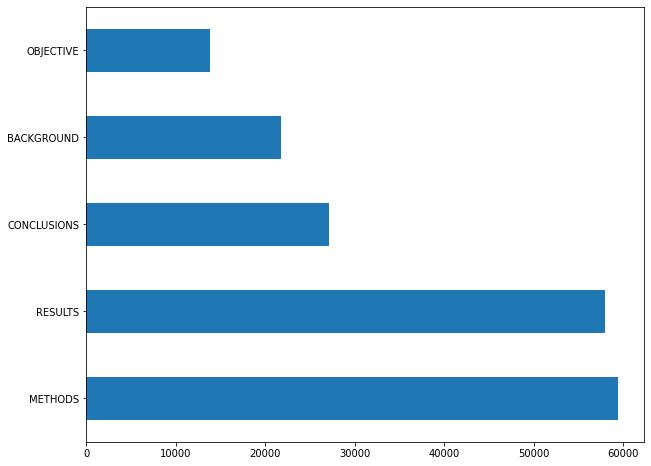

In [15]:
train_df['target'].value_counts().plot.barh(figsize = (10, 8));

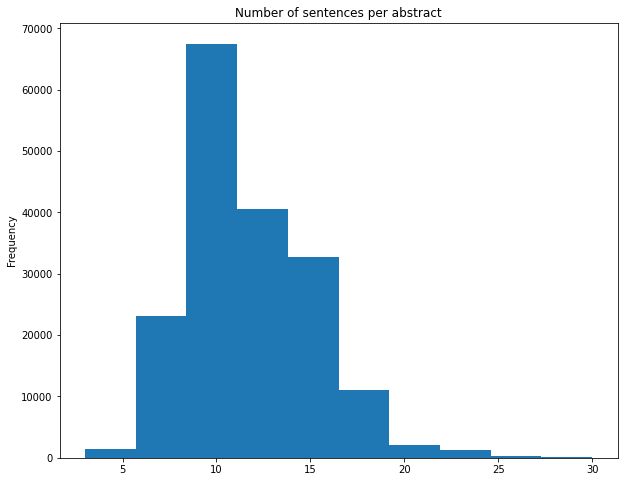

In [16]:
train_df['total_line'].plot.hist(figsize = (10, 8))
plt.title('Number of sentences per abstract');

In [17]:
train_df.tail()

,target,text,line_number,total_line
180035,RESULTS,For the absolute change in percent atheroma vo...,7,11
180036,RESULTS,"For PAV , a significantly greater percentage o...",8,11
180037,RESULTS,Both strategies had acceptable side effect pro...,9,11
180038,CONCLUSIONS,"Compared with standard statin monotherapy , th...",10,11
180039,CONCLUSIONS,( Plaque Regression With Cholesterol Absorptio...,11,11


In [18]:
train_text = train_df['text'].tolist()
val_text = val_df['text'].tolist()
test_text = test_df['text'].tolist()

In [19]:
train_text[:10]

['To investigate the efficacy of @ weeks of daily low-dose oral prednisolone in improving pain , mobility , and systemic low-grade inflammation in the short term and whether the effect would be sustained at @ weeks in older adults with moderate to severe knee osteoarthritis ( OA ) .',
 'A total of @ patients with primary knee OA were randomized @:@ ; @ received @ mg/day of prednisolone and @ received placebo for @ weeks .',
 'Outcome measures included pain reduction and improvement in function scores and systemic inflammation markers .',
 'Pain was assessed using the visual analog pain scale ( @-@ mm ) .',
 'Secondary outcome measures included the Western Ontario and McMaster Universities Osteoarthritis Index scores , patient global assessment ( PGA ) of the severity of knee OA , and @-min walk distance ( @MWD ) .',
 'Serum levels of interleukin @ ( IL-@ ) , IL-@ , tumor necrosis factor ( TNF ) - , and high-sensitivity C-reactive protein ( hsCRP ) were measured .',
 'There was a clinic

## Feature Engineering the dataset

In [20]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(train_df["target"].to_numpy().reshape(-1, 1))
val_labels_one_hot = one_hot_encoder.transform(val_df["target"].to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(test_df["target"].to_numpy().reshape(-1, 1))

# Check what training labels look like
train_labels_one_hot[:10]

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [21]:
#Label encoded Target columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
train_label_encoder = label_encoder.fit_transform(train_df['target'].to_numpy())
val_label_encoder = label_encoder.transform(val_df['target'].to_numpy())
test_label_encoder = label_encoder.transform(test_df['target'].to_numpy())


train_label_encoder[:5]

array([3, 2, 2, 2, 2])

In [22]:
#Building a base model Algorithm
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

base_model = Pipeline([('text_vectorizer', TfidfVectorizer()),
                       ('naive_bayes', MultinomialNB())])

base_model.fit(train_text, train_label_encoder)

Pipeline(steps=[('text_vectorizer', TfidfVectorizer()),
                ('naive_bayes', MultinomialNB())])

In [23]:
base_model.score(test_text, test_label_encoder)

0.716674962667994

In [24]:
prediction = base_model.predict(test_text)
prediction[:10]

array([2, 2, 2, 4, 4, 4, 4, 1, 4, 0])

In [25]:
## Building a function of Classification score Matrix

from sklearn.metrics import precision_score,f1_score,recall_score,accuracy_score

def algorithm_score(true_value, model_prediction):

  """
  A function that accepts the True_Values and Model predictions.
  Calculates the precision_score,f1_score and recall_score hence returning 
  a dictionary of precision, recall and f1_score.
  """
  accuracy = accuracy_score(true_value, model_prediction)
  F1 = f1_score(true_value, model_prediction, average = 'weighted')
  precision = precision_score(true_value, model_prediction, average = 'weighted')
  recall = recall_score(true_value, model_prediction, average = 'weighted')

  score_dict = {}
  score_dict['Accuracy'] = accuracy
  score_dict['F1'] = F1
  score_dict['precision'] = precision
  score_dict['recall'] = recall
  
  return score_dict

In [26]:
baseline_model_score = algorithm_score(test_label_encoder, prediction)
baseline_model_score

{'Accuracy': 0.716674962667994,
 'F1': 0.6925101703856846,
 'precision': 0.7124322482375202,
 'recall': 0.716674962667994}

## Exploratory Analysis for Deep Learning Modelling

In [27]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
token_length = [len(sentence.split()) for sentence in train_text]
average_length = np.mean(token_length)
average_length

26.338269273494777

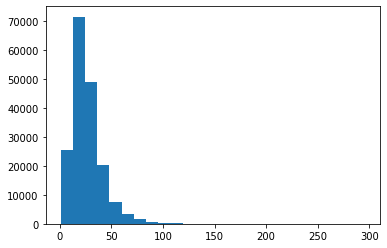

In [29]:
plt.hist(token_length, bins = 25);

In [30]:
# How long of a sentence covers 95% of the lengths?
output_seq_len = int(np.percentile(token_length, 95))
output_seq_len

55

In [31]:
max_tokens = max(token_length)
max_tokens

296

## Creating a text Vectorizer and Embedding layer for deep sequence modelling

In [32]:
text_vectorizer = tf.keras.layers.TextVectorization(
                             max_tokens=None,
                            standardize='lower_and_strip_punctuation',
                            split='whitespace',
                            ngrams=None,
                            output_mode='int',
                            output_sequence_length=None,
                            pad_to_max_tokens=False,
                            vocabulary=None)

In [33]:
## Creating a text vectorizer
max_vocab = 68000  #The maximum word in the vocab is 68,000 taken from the research paper (taken from 3.2 in https://arxiv.org/pdf/1710.06071.pdf)
sequence_length = 55

text_vectorizer = tf.keras.layers.TextVectorization(
                                            max_tokens = max_vocab,
                                            standardize = 'lower_and_strip_punctuation',
                                            split = 'whitespace',
                                            output_mode = 'int',
                                            output_sequence_length = sequence_length)

##Mapping the text_vectorizer to our training data.
text_vectorizer.adapt(train_text)

In [34]:
## Visualizing our text vectorizer mapping.
import random
random_sentence = random.choice(train_text)
print(f'\n The sentence is: "{random_sentence}"')
print(f'\n The total length of tokens is {len(random_sentence.split())}')
print(f'\n the mapped sentence is {text_vectorizer(random_sentence)}')


 The sentence is: "The PK parameters of gemigliptin and metformin were compared between fasting and fed states ."

 The total length of tokens is 15

 the mapped sentence is [    2  2193   315     4 10745     3   886     9    34    30   662     3
  2444  1307     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0]


In [35]:
embedded = tf.keras.layers.Embedding(
                            input_dim = 68000,
                            input_length = 55,
                            output_dim = 128,
                            mask_zero=True,
                            embeddings_initializer = 'uniform'
)

In [36]:
# Turn our data into TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_text, train_labels_one_hot))
valid_dataset = tf.data.Dataset.from_tensor_slices((val_text, val_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_text, test_labels_one_hot))

train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(5,), dtype=tf.float64, name=None))>

In [37]:
# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
valid_dataset = valid_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)


## Building 1D convolutionary Deep learning Model

In [38]:
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [39]:
Inputs = tf.keras.Input(shape = (1,), dtype=tf.string)
text_vec_layer = text_vectorizer(Inputs) # vectorize text inputs
embedding_layer = embedded(text_vec_layer) # create embedding
x = tf.keras.layers.Conv1D(filters=64, kernel_size = 3, padding = 'same', activation = 'relu')(embedding_layer)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
outputs = tf.keras.layers.Dense(5, activation = 'softmax')(x)
model_1 = tf.keras.Model(Inputs, outputs)

model_1.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [40]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 55)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 55, 128)           8704000   
                                                                 
 conv1d (Conv1D)             (None, 55, 64)            24640     
                                                                 
 global_average_pooling1d (G  (None, 64)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 5)                 325   

In [41]:
# Fit the model
model_1_history = model_1.fit(train_dataset, epochs = 10,
                              steps_per_epoch = int(0.1 * len (train_dataset)),
                              validation_data = valid_dataset,
                              validation_steps = int(0.1 * len(valid_dataset)))

Epoch 1/10
562/562 [==============================] - 38s 47ms/step - loss: 0.9611 - accuracy: 0.6209 - val_loss: 0.6916 - val_accuracy: 0.7357
Epoch 2/10
562/562 [==============================] - 7s 13ms/step - loss: 0.6633 - accuracy: 0.7546 - val_loss: 0.6331 - val_accuracy: 0.7670
Epoch 3/10
562/562 [==============================] - 5s 9ms/step - loss: 0.6246 - accuracy: 0.7700 - val_loss: 0.6018 - val_accuracy: 0.7826
Epoch 4/10
562/562 [==============================] - 4s 8ms/step - loss: 0.5986 - accuracy: 0.7835 - val_loss: 0.5805 - val_accuracy: 0.7826
Epoch 5/10
562/562 [==============================] - 5s 9ms/step - loss: 0.5982 - accuracy: 0.7874 - val_loss: 0.5662 - val_accuracy: 0.7949
Epoch 6/10
562/562 [==============================] - 6s 10ms/step - loss: 0.5870 - accuracy: 0.7896 - val_loss: 0.5650 - val_accuracy: 0.7955
Epoch 7/10
562/562 [==============================] - 6s 10ms/step - loss: 0.5662 - accuracy: 0.7993 - val_loss: 0.5495 - val_accuracy: 0.8042
E

In [42]:
model_1_plot = pd.DataFrame(model_1_history.history)
model_1_plot

,loss,accuracy,val_loss,val_accuracy
0,0.961083,0.620941,0.691616,0.735705
1,0.663289,0.754560,0.633079,0.766955
2,0.624631,0.769962,0.601830,0.782580
3,0.598640,0.783530,0.580528,0.782580
4,0.598189,0.787367,0.566197,0.794880
5,0.586985,0.789646,0.564957,0.795545
6,0.566245,0.799322,0.549465,0.804189
7,0.548159,0.808719,0.536417,0.812168
8,0.549860,0.806050,0.558366,0.794880
9,0.552317,0.803603,0.539022,0.802859


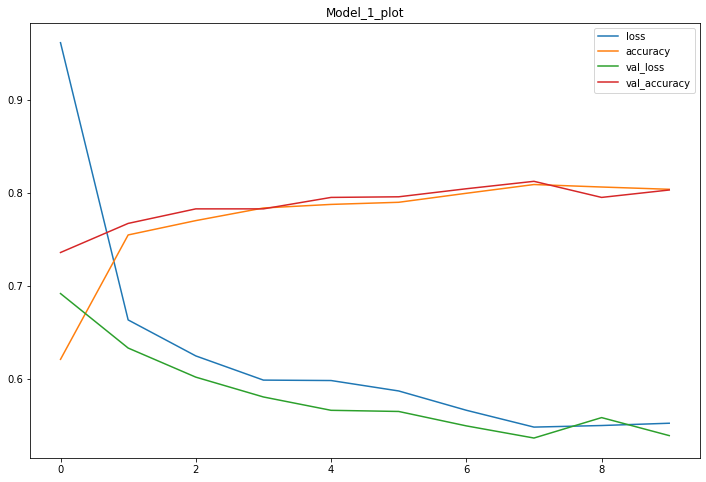

In [43]:
plt.figure(figsize = (12, 8))
plt.plot(model_1_plot)
plt.legend(model_1_plot)
plt.title('Model_1_plot');

In [44]:
## Evaluating model_1 on the entire test dataset
model_1_accuracy = model_1.evaluate(test_dataset)
model_1_accuracy

942/942 [==============================] - 3s 3ms/step - loss: 0.5501 - accuracy: 0.8034


[0.5500759482383728, 0.803417980670929]

In [45]:
model_1_prediction = model_1.predict(valid_dataset)
model_1_prediction = tf.argmax(model_1_prediction, axis=1)
model_1_prediction

945/945 [==============================] - 2s 2ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 0, 3, ..., 4, 1, 1])>

In [46]:
model_1_score = algorithm_score(val_label_encoder, model_1_prediction)
model_1_score

{'Accuracy': 0.8094134780881769,
 'F1': 0.8062183359793211,
 'precision': 0.8054293047648052,
 'recall': 0.8094134780881769}

## Building a pretrained feature extraction model with token embeddings

In [47]:
import tensorflow_hub as hub

USE_embed = hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4',
                           trainable = False, name = 'universal_sentence_encoder')

In [48]:
## Visualizing Pretrained vectorization.
random_sentence = random.choice(train_text)
embeddings = USE_embed([random_sentence])

print(f'\n The sentence is:"{random_sentence}"\n')
print(f'The embbed token is {embeddings[0][:50]}')
print(f'The shape of the token is: {embeddings[0].shape}')


 The sentence is:"A significant improvement after training on the Action Research Arm Test ( ARAT ) was demonstrated in the experimental group ( p = @ ) ."

The embbed token is [ 0.02417545  0.00534658 -0.01499567 -0.08273291 -0.0334865   0.03399654
  0.04333127 -0.04176997  0.01037728  0.00915188  0.06225828  0.02251565
  0.08990565  0.01207501  0.03269294 -0.00145491 -0.02821156  0.04159026
  0.02658305 -0.08324096 -0.08079367  0.03366482 -0.08059294  0.01998679
  0.01590029  0.0796169   0.00811801 -0.00956597 -0.050053    0.00794263
 -0.01613734  0.04973111  0.00507879 -0.06938071 -0.06835458  0.05322624
 -0.05916112 -0.05040888 -0.02196846 -0.02744551 -0.04757339  0.05345305
 -0.02488635  0.04529878 -0.03996018 -0.01196111  0.00767148  0.00470409
  0.02952342  0.00435356]
The shape of the token is: (512,)


In [52]:
#from tensorflow.python.eager.function import USE_FUNCTION_SUBTYPING
## Building model 2 feature extraction using a pretrained Model.

Inputs = tf.keras.Input(shape=[], dtype=tf.string)
embedded_layer = USE_embed(Inputs)
x = tf.keras.layers.Dense(120, activation = 'relu')
x = tf.keras.layers.GlobalAveragePooling1D()(tf.expand_dims(embedded_layer,axis = 1))
Output = tf.keras.layers.Dense(5, activation = 'softmax')(x)
model_2 = tf.keras.Model(Inputs, Output)

model_2.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [53]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 1, 512)           0         
                                                                 
 global_average_pooling1d_1   (None, 512)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_2 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 256,800,389
Trainable params: 2,565
Non-train

In [54]:
history_2 = model_2.fit(train_dataset, epochs = 10,
                        validation_data = valid_dataset,
                        steps_per_epoch = int(0.1 * len(train_dataset)),
                        validation_steps = int(0.1 * len(valid_dataset)))

Epoch 1/10
562/562 [==============================] - 17s 24ms/step - loss: 1.2573 - accuracy: 0.5428 - val_loss: 1.0839 - val_accuracy: 0.6031
Epoch 2/10
562/562 [==============================] - 12s 21ms/step - loss: 1.0109 - accuracy: 0.6263 - val_loss: 0.9548 - val_accuracy: 0.6509
Epoch 3/10
562/562 [==============================] - 7s 12ms/step - loss: 0.9309 - accuracy: 0.6575 - val_loss: 0.8954 - val_accuracy: 0.6745
Epoch 4/10
562/562 [==============================] - 8s 14ms/step - loss: 0.8739 - accuracy: 0.6784 - val_loss: 0.8624 - val_accuracy: 0.6815
Epoch 5/10
562/562 [==============================] - 7s 12ms/step - loss: 0.8638 - accuracy: 0.6766 - val_loss: 0.8409 - val_accuracy: 0.6838
Epoch 6/10
562/562 [==============================] - 8s 14ms/step - loss: 0.8525 - accuracy: 0.6809 - val_loss: 0.8271 - val_accuracy: 0.6915
Epoch 7/10
562/562 [==============================] - 8s 14ms/step - loss: 0.8251 - accuracy: 0.6880 - val_loss: 0.8151 - val_accuracy: 0.69

In [55]:
model_2_plot = pd.DataFrame(history_2.history)
model_2_plot

,loss,accuracy,val_loss,val_accuracy
0,1.257278,0.542816,1.083932,0.603059
1,1.010930,0.626335,0.954787,0.650931
2,0.930907,0.657529,0.895403,0.674535
3,0.873856,0.678381,0.862382,0.681516
4,0.863821,0.676601,0.840923,0.683843
5,0.852515,0.680883,0.827136,0.691489
6,0.825101,0.688000,0.815145,0.694814
7,0.810708,0.696341,0.807281,0.696476
8,0.804110,0.696897,0.801464,0.695811
9,0.804751,0.693950,0.797623,0.697473


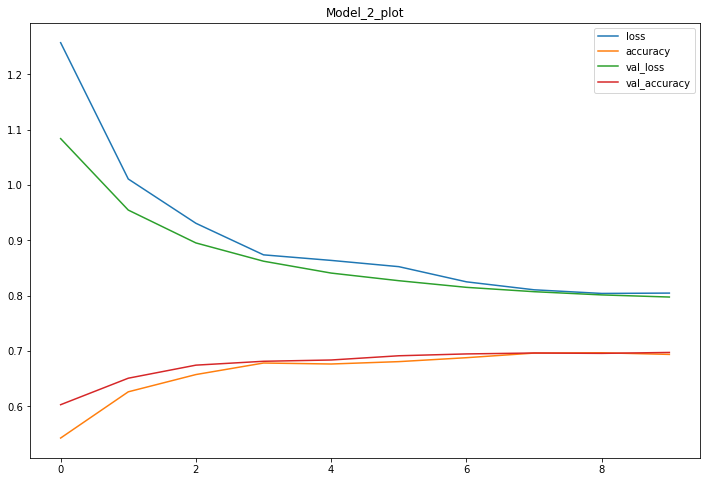

In [56]:
plt.figure(figsize = (12, 8))
plt.plot(model_2_plot)
plt.legend(model_2_plot)
plt.title('Model_2_plot');

In [57]:
## Evaluating model_1 on the entire test dataset
model_2_accuracy = model_1.evaluate(valid_dataset)
model_2_accuracy

945/945 [==============================] - 3s 3ms/step - loss: 0.5350 - accuracy: 0.8094


[0.5349516868591309, 0.809413492679596]

In [58]:
model_2_prediction = model_2.predict(valid_dataset)
model_2_prediction = tf.argmax(model_2_prediction, axis=1)
model_2_prediction

945/945 [==============================] - 10s 10ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([0, 1, 3, ..., 4, 4, 2])>

In [59]:
model_2_score = algorithm_score(val_label_encoder, model_2_prediction)
model_2_score

{'Accuracy': 0.6997550642128956,
 'F1': 0.6938551972082923,
 'precision': 0.6933581880399449,
 'recall': 0.6997550642128956}

## Model 3 Character Level embedding

In [60]:
def char_text(text):

  """
  A function that takes a list of strings and convert them to splitted 
  character level string
  """
  return " ".join(list(text))

In [61]:
char_train = [char_text(sentence) for sentence in train_text]
char_test = [char_text(sentence) for sentence in test_text]
char_valid = [char_text(sentence) for sentence  in val_text]

In [62]:
## Exploratory analysis on character level tokens

char_length = [len(sentence) for sentence in train_text]
char_average = np.mean(char_length)
char_average

149.3662574983337

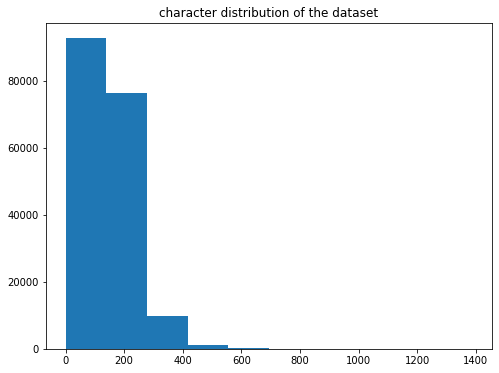

In [63]:
plt.figure(figsize =(8, 6))
plt.hist(char_length)
plt.title('character distribution of the dataset');

In [64]:
## How long are the characters in the dataset. Find the 95th percentile.
char_95_percentile = int(np.percentile(char_length, 95))
char_95_percentile

290

In [65]:
char_train[:2]

['T o   i n v e s t i g a t e   t h e   e f f i c a c y   o f   @   w e e k s   o f   d a i l y   l o w - d o s e   o r a l   p r e d n i s o l o n e   i n   i m p r o v i n g   p a i n   ,   m o b i l i t y   ,   a n d   s y s t e m i c   l o w - g r a d e   i n f l a m m a t i o n   i n   t h e   s h o r t   t e r m   a n d   w h e t h e r   t h e   e f f e c t   w o u l d   b e   s u s t a i n e d   a t   @   w e e k s   i n   o l d e r   a d u l t s   w i t h   m o d e r a t e   t o   s e v e r e   k n e e   o s t e o a r t h r i t i s   (   O A   )   .',
 'A   t o t a l   o f   @   p a t i e n t s   w i t h   p r i m a r y   k n e e   O A   w e r e   r a n d o m i z e d   @ : @   ;   @   r e c e i v e d   @   m g / d a y   o f   p r e d n i s o l o n e   a n d   @   r e c e i v e d   p l a c e b o   f o r   @   w e e k s   .']

In [66]:
## getting the maxvocabulary for unique values in character level dataset
import string
alphabet = string.ascii_lowercase + string.digits
alphabet, len(alphabet)

MAX_TOKENS = len(alphabet)

In [67]:
#setting up character level vectorization

char_vectorizer = tf.keras.layers.TextVectorization(
                                            max_tokens = MAX_TOKENS,
                                            standardize = 'lower_and_strip_punctuation',
                                            output_sequence_length = char_95_percentile)

char_vectorizer.adapt(char_train)

In [68]:
##visualising character vectorizer
random_sentence = random.choice(train_text)
vec = char_text(random_sentence)
char_vec = char_vectorizer(vec)

print(f'Original_sentence: {random_sentence}')
print(f'\nCharacter_sentence:{char_text(random_sentence)}')
print(f'\nLength char_sentence: {len(char_text(random_sentence))}')
print(f'\nCharacter_vectorizer: {char_vec}')
print(f'\nLength :{len(char_vec)}')

Original_sentence: Glucose and insulin concentrations were significantly higher in the LG than in the @G group at @ and @h after infusion .

Character_sentence:G l u c o s e   a n d   i n s u l i n   c o n c e n t r a t i o n s   w e r e   s i g n i f i c a n t l y   h i g h e r   i n   t h e   L G   t h a n   i n   t h e   @ G   g r o u p   a t   @   a n d   @ h   a f t e r   i n f u s i o n   .

Length char_sentence: 239

Character_vectorizer: [18 12 16 11  7  9  2  5  6 10  4  6  9 16 12  4  6 11  7  6 11  2  6  3
  8  5  3  4  7  6  9 20  2  8  2  9  4 18  6  4 17  4 11  5  6  3 12 19
 13  4 18 13  2  8  4  6  3 13  2 12 18  3 13  5  6  4  6  3 13  2 18 18
  8  7 16 14  5  3  5  6 10 13  5 17  3  2  8  4  6 17 16  9  4  7  6  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0

In [69]:
## Finding the most occurring and the least occuring characters on character text dataset
char_vocab = char_vectorizer.get_vocabulary()
print(f'10 most occurring characters: {char_vocab[:10]}')
print(f'\n10 least occurring characters: {char_vocab[-10:]}')

10 most occurring characters: ['', '[UNK]', 'e', 't', 'i', 'a', 'n', 'o', 'r', 's']

10 least occurring characters: ['g', 'y', 'w', 'v', 'b', 'k', 'x', 'z', 'q', 'j']


In [70]:
# Create char embedding layer
char_embed = tf.keras.layers.Embedding(input_dim=MAX_TOKENS, # number of different characters
                              output_dim=25, # embedding dimension of each character (same as Figure 1 in https://arxiv.org/pdf/1612.05251.pdf)
                              mask_zero=False, # don't use masks (this messes up model_5 if set to True)
                              name="char_embed")

# Test out character embedding layer
print(f"Charified text (before vectorization and embedding):\n{vec}\n")
char_embed_example = char_embed(char_vectorizer([vec]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
G l u c o s e   a n d   i n s u l i n   c o n c e n t r a t i o n s   w e r e   s i g n i f i c a n t l y   h i g h e r   i n   t h e   L G   t h a n   i n   t h e   @ G   g r o u p   a t   @   a n d   @ h   a f t e r   i n f u s i o n   .

Embedded chars (after vectorization and embedding):
[[[ 0.03761632 -0.02194365  0.00060944 ... -0.03585832  0.00278205
    0.01069046]
  [-0.03306208  0.03123648  0.044706   ...  0.01145203  0.00302742
   -0.00631582]
  [-0.00214963 -0.0358466   0.02857915 ...  0.02639698 -0.0430959
    0.02295864]
  ...
  [-0.03893692  0.00334488  0.01049349 ...  0.03369926 -0.03266972
    0.02964966]
  [-0.03893692  0.00334488  0.01049349 ...  0.03369926 -0.03266972
    0.02964966]
  [-0.03893692  0.00334488  0.01049349 ...  0.03369926 -0.03266972
    0.02964966]]]

Character embedding shape: (1, 290, 25)


In [71]:
##Building Model3 with character level embeddings
Inputs = tf.keras.Input(shape = (1,), dtype = tf.string)
char_vector = char_vectorizer(Inputs)
embeddings = char_embed(char_vector)
x = tf.keras.layers.Conv1D(filters= 64, kernel_size = 3, padding ='same')(embeddings)
x = tf.keras.layers.GlobalAveragePooling1D()(x)
Output = tf.keras.layers.Dense(5, activation = 'softmax', name = 'Output_layer')(x)
Model_3 = tf.keras.Model(Inputs, Output)

Model_3.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [72]:
Model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_2 (TextV  (None, 290)              0         
 ectorization)                                                   
                                                                 
 char_embed (Embedding)      (None, 290, 25)           900       
                                                                 
 conv1d_1 (Conv1D)           (None, 290, 64)           4864      
                                                                 
 global_average_pooling1d_2   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 Output_layer (Dense)        (None, 5)                 325 

In [73]:
# Create char datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((char_train, train_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((char_valid, val_labels_one_hot)).batch(32).prefetch(tf.data.AUTOTUNE)

train_char_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [74]:
History_3 = Model_3.fit(train_char_dataset, epochs = 10,
                        steps_per_epoch = int(0.1 * len(train_char_dataset)),
                        validation_data = val_char_dataset,
                        validation_steps = int(0.1 * len(val_char_dataset)))

Epoch 1/10
562/562 [==============================] - 5s 6ms/step - loss: 1.4612 - accuracy: 0.3320 - val_loss: 1.4175 - val_accuracy: 0.3617
Epoch 2/10
562/562 [==============================] - 3s 5ms/step - loss: 1.3738 - accuracy: 0.4035 - val_loss: 1.3366 - val_accuracy: 0.4342
Epoch 3/10
562/562 [==============================] - 4s 7ms/step - loss: 1.3301 - accuracy: 0.4470 - val_loss: 1.3187 - val_accuracy: 0.4425
Epoch 4/10
562/562 [==============================] - 3s 6ms/step - loss: 1.3132 - accuracy: 0.4451 - val_loss: 1.3101 - val_accuracy: 0.4531
Epoch 5/10
562/562 [==============================] - 3s 6ms/step - loss: 1.3152 - accuracy: 0.4437 - val_loss: 1.3076 - val_accuracy: 0.4545
Epoch 6/10
562/562 [==============================] - 4s 6ms/step - loss: 1.3133 - accuracy: 0.4540 - val_loss: 1.3083 - val_accuracy: 0.4548
Epoch 7/10
562/562 [==============================] - 4s 6ms/step - loss: 1.3139 - accuracy: 0.4476 - val_loss: 1.3131 - val_accuracy: 0.4471
Epoch 

In [75]:
model_3_plot = pd.DataFrame(History_3.history)
model_3_plot

,loss,accuracy,val_loss,val_accuracy
0,1.461244,0.332017,1.417509,0.361702
1,1.373820,0.403525,1.336612,0.434176
2,1.330107,0.447008,1.318743,0.442487
3,1.313229,0.445062,1.310091,0.453125
4,1.315169,0.443672,1.307612,0.454455
5,1.313317,0.454015,1.308313,0.454787
6,1.313931,0.447565,1.313102,0.447141
7,1.306805,0.455683,1.304205,0.456117
8,1.311599,0.449844,1.308432,0.458444
9,1.311792,0.451068,1.306338,0.452128


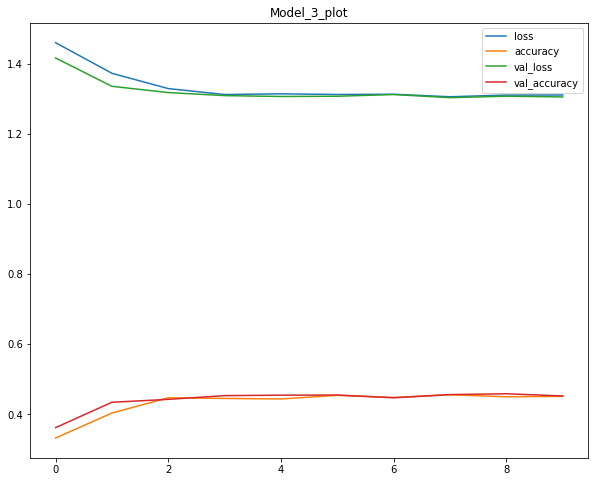

In [76]:
plt.figure(figsize = (10, 8))
plt.plot(model_3_plot)
plt.legend(model_3_plot)
plt.title('Model_3_plot');

In [77]:
Model_3.evaluate(val_char_dataset)

945/945 [==============================] - 4s 4ms/step - loss: 1.3035 - accuracy: 0.4619


[1.3035244941711426, 0.4619356691837311]

In [78]:
model_3_prediction = Model_3.predict(val_char_dataset)
model_3_prediction = tf.argmax(model_3_prediction, axis = 1)
model_3_prediction

945/945 [==============================] - 3s 3ms/step


<tf.Tensor: shape=(30212,), dtype=int64, numpy=array([2, 4, 2, ..., 4, 4, 4])>

In [79]:
model_3_score = algorithm_score(val_label_encoder, model_3_prediction)
model_3_score

{'Accuracy': 0.46193565470673903,
 'F1': 0.4160981706795409,
 'precision': 0.42334026070199904,
 'recall': 0.46193565470673903}

## Model 4: Combining pretrained token embeddings + character embeddings (hybrid embedding layer)

In [80]:
## Building a Tensorflow Token Embedding with the keras functional API.
inputs = tf.keras.layers.Input(shape = [ ], name = 'Token_embedding', dtype = tf.string)
token_embedding = USE_embed(inputs)
token_output = tf.keras.layers.Dense(128, activation = 'relu')(token_embedding)
token_model = tf.keras.Model(inputs, token_output)


## Building a character embedding with the keras functional API
char_inputs = tf.keras.layers.Input(shape=(1,),  dtype = tf.string, name ='Char_embedding')
char_vector = char_vectorizer(char_inputs)
embeddings = char_embed(char_vector)
char_bi_lstm= tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50))(embeddings) #bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

##cocantonate the token embeddings and character embeddings
combined_model = tf.keras.layers.Concatenate(name = 'token_char_hybrid')([token_model.output,
                                                                         char_model.output])

##create a combined output layer as shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
combined_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(350))(tf.expand_dims(combined_model, axis = 1)) #bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
combined_dropout = tf.keras.layers.Dropout(0.5)(combined_bi_lstm)
combined_dense = tf.keras.layers.Dense(200, activation = 'relu')(combined_dropout)
final_dropout = tf.keras.layers.Dropout(0.5)(combined_dense)
output_layer =tf.keras.layers.Dense(5, activation = 'softmax')(final_dropout)

# 5. Construct model with char and token inputs
model_4 = tf.keras.Model(inputs=[token_model.input, char_model.input],
                         outputs=output_layer,
                         name="model_4_token_and_char_embeddings")

In [81]:
model_4.summary()

Model: "model_4_token_and_char_embeddings"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Char_embedding (InputLayer)    [(None, 1)]          0           []                               
                                                                                                  
 Token_embedding (InputLayer)   [(None,)]            0           []                               
                                                                                                  
 text_vectorization_2 (TextVect  (None, 290)         0           ['Char_embedding[0][0]']         
 orization)                                                                                       
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   [

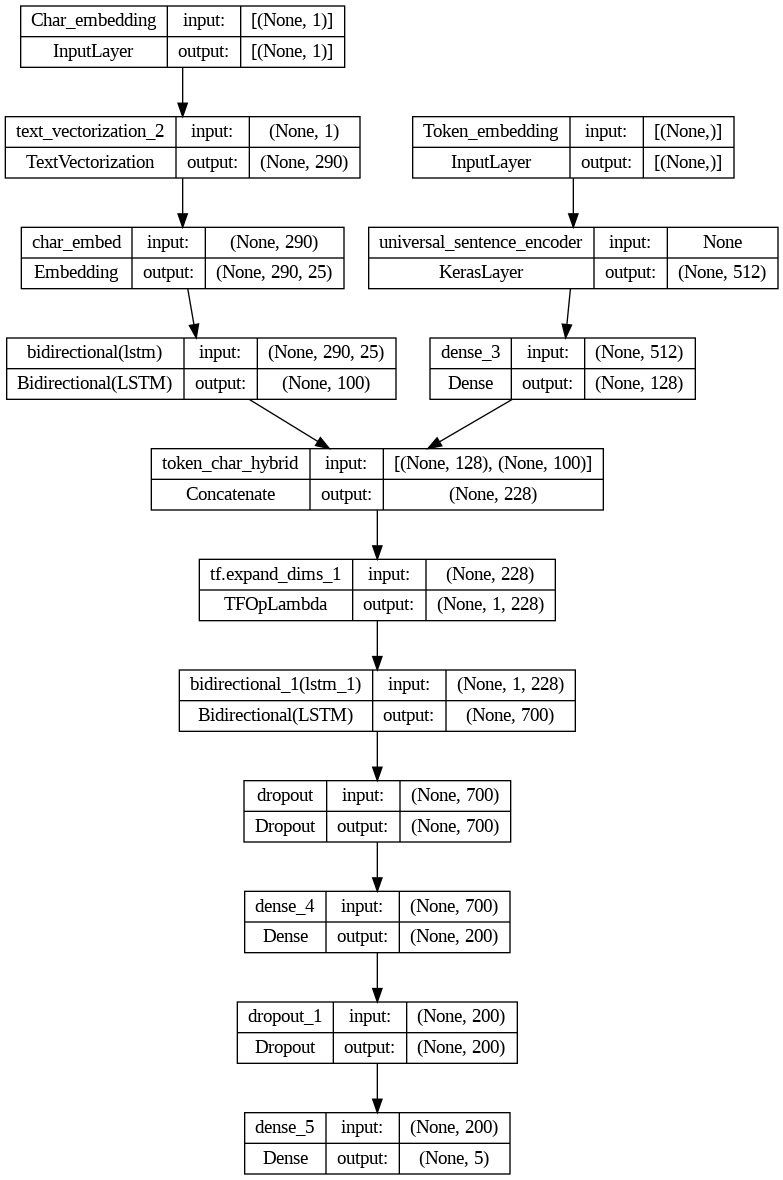

In [82]:
from tensorflow.keras.utils import plot_model
plot_model(model_4, show_shapes = True)

In [83]:
model_4.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

In [84]:
# Combine chars and tokens into a dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((train_text, char_train)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels

# Prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 

# Repeat same steps validation data
val_char_token_data = tf.data.Dataset.from_tensor_slices((val_text, char_valid))
val_char_token_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_token_dataset = tf.data.Dataset.zip((val_char_token_data, val_char_token_labels))
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [85]:
history_4 =model_4.fit(train_char_token_dataset, epochs = 10,
                       steps_per_epoch = int(0.1 * (len(train_char_token_dataset))),
                       validation_data = val_char_token_dataset,
                       validation_steps = int(0.1 *len(val_char_token_dataset)))

Epoch 1/10
562/562 [==============================] - 32s 39ms/step - loss: 0.9124 - accuracy: 0.6349 - val_loss: 0.7658 - val_accuracy: 0.7005
Epoch 2/10
562/562 [==============================] - 20s 35ms/step - loss: 0.7405 - accuracy: 0.7176 - val_loss: 0.6968 - val_accuracy: 0.7380
Epoch 3/10
562/562 [==============================] - 19s 33ms/step - loss: 0.7113 - accuracy: 0.7267 - val_loss: 0.6585 - val_accuracy: 0.7487
Epoch 4/10
562/562 [==============================] - 20s 35ms/step - loss: 0.6837 - accuracy: 0.7444 - val_loss: 0.6427 - val_accuracy: 0.7580
Epoch 5/10
562/562 [==============================] - 21s 37ms/step - loss: 0.6887 - accuracy: 0.7390 - val_loss: 0.6339 - val_accuracy: 0.7490
Epoch 6/10
562/562 [==============================] - 19s 34ms/step - loss: 0.6831 - accuracy: 0.7394 - val_loss: 0.6320 - val_accuracy: 0.7646
Epoch 7/10
562/562 [==============================] - 20s 35ms/step - loss: 0.6479 - accuracy: 0.7590 - val_loss: 0.6269 - val_accuracy:

In [86]:
model_4.evaluate(val_char_token_dataset)

945/945 [==============================] - 18s 19ms/step - loss: 0.6029 - accuracy: 0.7714


[0.6029371023178101, 0.771382212638855]

In [87]:
model_4_pred = model_4.predict(val_char_token_dataset)
model_4_pred = tf.argmax(model_4_pred, axis = 1)

945/945 [==============================] - 19s 18ms/step


In [88]:
model_4_pred[:10]

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 2, 2, 4, 4, 2, 4, 1])>

In [89]:
model_4_score = algorithm_score(val_label_encoder, model_4_pred)
model_4_score

{'Accuracy': 0.7713822322256058,
 'F1': 0.7682289153755172,
 'precision': 0.7715134151723914,
 'recall': 0.7713822322256058}

In [90]:
model_4_plot = pd.DataFrame(history_4.history)
model_4_plot

,loss,accuracy,val_loss,val_accuracy
0,0.912434,0.634898,0.765822,0.700465
1,0.740524,0.717638,0.696806,0.738032
2,0.711251,0.726701,0.658522,0.748670
3,0.683654,0.744439,0.642734,0.757979
4,0.688652,0.738990,0.633932,0.749003
5,0.683148,0.739435,0.631969,0.764628
6,0.647862,0.759008,0.626949,0.766622
7,0.641565,0.759119,0.606423,0.771941
8,0.644150,0.757840,0.625159,0.760306
9,0.635091,0.762233,0.602067,0.773936


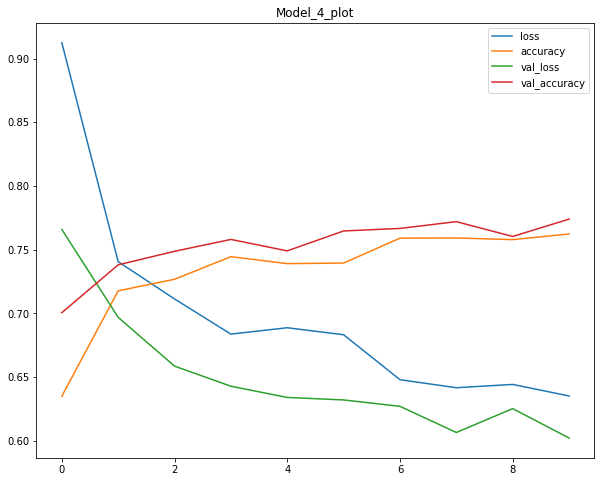

In [91]:
plt.figure(figsize = (10, 8))
plt.plot(model_4_plot)
plt.legend(model_4_plot)
plt.title('Model_4_plot');

## Creating a positional Embedding for Our final Model. Model_5

In [92]:
train_df.head()

,target,text,line_number,total_line
0,OBJECTIVE,To investigate the efficacy of @ weeks of dail...,0,11
1,METHODS,A total of @ patients with primary knee OA wer...,1,11
2,METHODS,Outcome measures included pain reduction and i...,2,11
3,METHODS,Pain was assessed using the visual analog pain...,3,11
4,METHODS,Secondary outcome measures included the Wester...,4,11


In [93]:
train_df['line_number'].value_counts()

0     15000
1     15000
2     15000
3     15000
4     14992
5     14949
6     14758
7     14279
8     13346
9     11981
10    10041
11     7892
12     5853
13     4152
14     2835
15     1861
16     1188
17      751
18      462
19      286
20      162
21      101
22       66
23       33
24       22
25       14
26        7
27        4
28        3
29        1
30        1
Name: line_number, dtype: int64

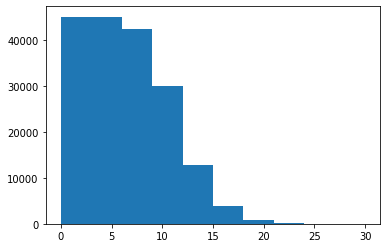

In [94]:
plt.hist(train_df['line_number']);

One_hot encode our line till the 20th line since it covers majority of tokens

In [95]:
onehot_train_line = tf.one_hot(train_df['line_number'].to_numpy(), depth = 20)
onehot_val_line = tf.one_hot(val_df['line_number'].to_numpy(), depth = 20)
onehot_test_line = tf.one_hot(test_df['line_number'].to_numpy(), depth = 20)

In [96]:
onehot_train_line[:10]

<tf.Tensor: shape=(10, 20), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
     

In [97]:
train_df['total_line'].value_counts()

11    24468
10    23639
12    22113
9     19400
13    18438
14    14610
8     12285
15    10768
7      7464
16     7429
17     5202
6      3353
18     3344
19     2480
20     1281
5      1146
21      770
22      759
23      264
4       215
24      200
25      182
26       81
28       58
3        32
30       31
27       28
Name: total_line, dtype: int64

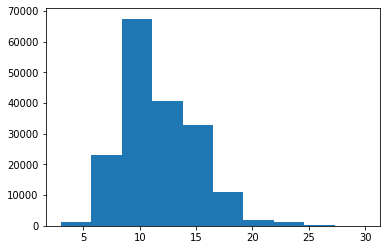

In [98]:
plt.hist(train_df['total_line']);

In [99]:
np.percentile(train_df['total_line'], 98)

20.0

In [100]:
onehot_train_total_line = tf.one_hot(train_df['total_line'].to_numpy(), depth = 20)
onehot_val_total_line = tf.one_hot(val_df['total_line'].to_numpy(), depth = 20)
onehot_test_total_line = tf.one_hot(test_df['total_line'].to_numpy(), depth = 20)

In [101]:
onehot_train_total_line[:5]

<tf.Tensor: shape=(5, 20), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0.]], dtype=float32)>

In [102]:
## Building Model 5 a tribid Model

## Building a Tensorflow Token Embedding with the keras functional API.
inputs = tf.keras.layers.Input(shape = [ ], name = 'Token_embedding', dtype = tf.string)
token_embedding = USE_embed(inputs)
token_output = tf.keras.layers.Dense(128, activation = 'relu')(token_embedding)
token_model = tf.keras.Model(inputs, token_output)


## Building a character embedding with the keras functional API
char_inputs = tf.keras.layers.Input(shape=(1,),  dtype = tf.string, name ='Char_embedding')
char_vector = char_vectorizer(char_inputs)
embeddings = char_embed(char_vector)
char_bi_lstm= tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50))(embeddings) #bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
char_model = tf.keras.Model(char_inputs, char_bi_lstm)

#Line_number embeddings
line_number_inputs =tf.keras.layers.Input(shape=(20,), dtype=tf.int32, name="line_number_input")
x = tf.keras.layers.Dense(32, activation="relu")(line_number_inputs)
line_number_model = tf.keras.Model(inputs=line_number_inputs,
                                   outputs=x)

#Total_line embeddings
total_line_inputs = tf.keras.Input(shape=(20,), dtype = tf.int32, name = 'total_line_inputs')
x = tf.keras.layers.Dense(32, activation = 'relu')(total_line_inputs)
total_line_model = tf.keras.Model(inputs = total_line_inputs, 
                                  outputs = x)

##cocantonate the token embeddings and character embeddings
combined_model = tf.keras.layers.Concatenate(name = 'token_char_hybrid')([token_model.output,
                                                                         char_model.output])

##create a combined output layer as shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf

combined_bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(350))(tf.expand_dims(combined_model, axis = 1)) #bi-LSTM shown in Figure 1 of https://arxiv.org/pdf/1612.05251.pdf
combined_dropout = tf.keras.layers.Dropout(0.5)(combined_bi_lstm)
combined_dense = tf.keras.layers.Dense(256, activation = 'relu')(combined_dropout)
final_dropout = tf.keras.layers.Dropout(0.5)(combined_dense)
combined_positional_embeddings = tf.keras.layers.Concatenate(name = 'combined_positional_embeddings')([line_number_model.output,
                                                                                                       total_line_model.output,
                                                                                                       final_dropout])

output_layer =tf.keras.layers.Dense(5, activation = 'softmax')(combined_positional_embeddings)

# 5. Construct model with char and token inputs
model_5 = tf.keras.Model(inputs=[line_number_model.input,
                                 total_line_model.input,
                                 token_model.input, 
                                 char_model.input],
                         outputs=output_layer,
                         name="model_5_token_and_char_embeddings")

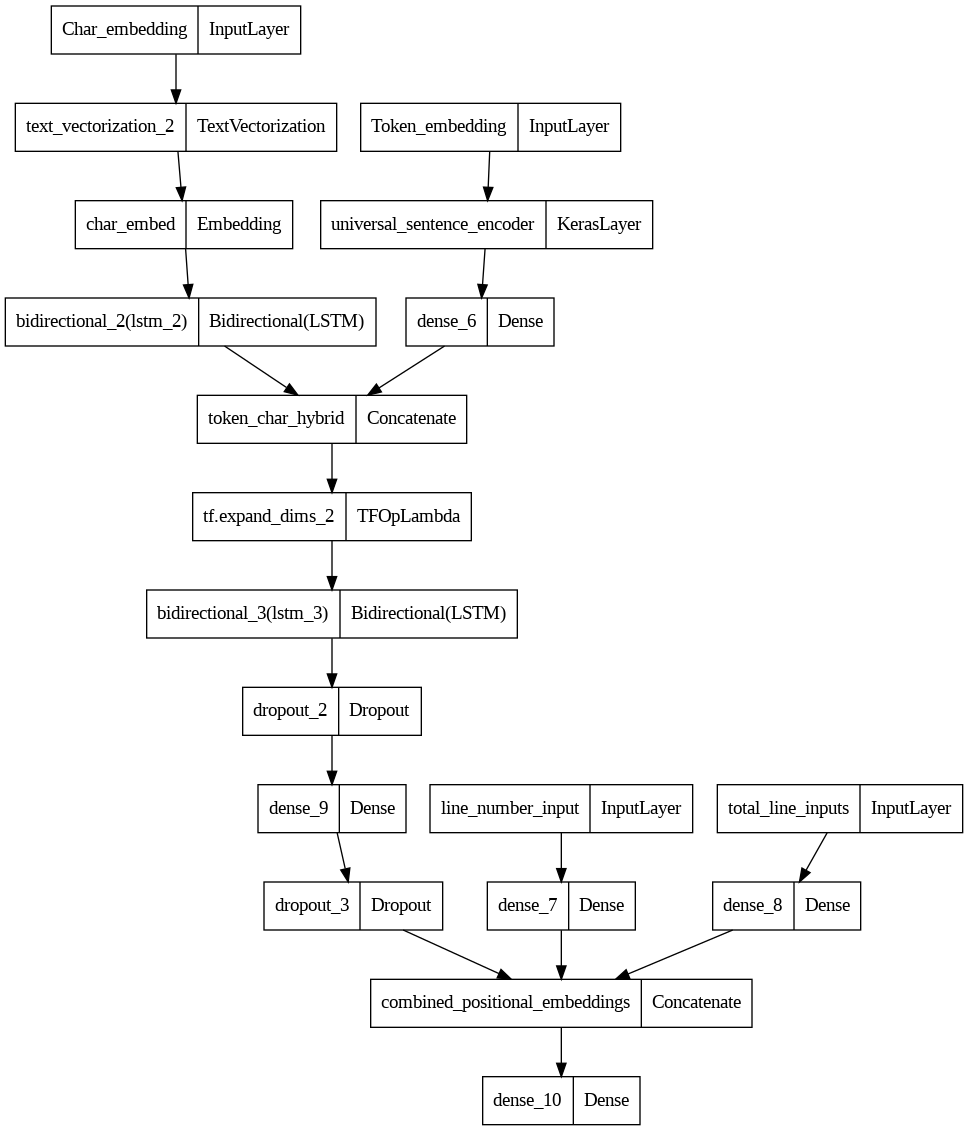

In [103]:
tf.keras.utils.plot_model(model_5)

In [104]:
# Combine chars and tokens into a dataset
train_char_pos_data = tf.data.Dataset.from_tensor_slices((onehot_train_line, onehot_train_total_line,
                                                            train_text, char_train)) # make data

train_char_pos_labels = tf.data.Dataset.from_tensor_slices(train_labels_one_hot) # make labels
train_char_pos_dataset = tf.data.Dataset.zip((train_char_pos_data, train_char_pos_labels)) # combine data and labels

# Prefetch and batch train data
train_char_pos_datasets = train_char_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 

# Repeat same steps validation data
val_char_pos_data = tf.data.Dataset.from_tensor_slices((onehot_val_line, onehot_val_total_line,
                                                          val_text, char_valid))

val_char_pos_labels = tf.data.Dataset.from_tensor_slices(val_labels_one_hot)
val_char_pos_dataset = tf.data.Dataset.zip((val_char_pos_data, val_char_pos_labels))
val_char_pos_datasets = val_char_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [105]:
train_char_pos_datasets

<PrefetchDataset element_spec=((TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [106]:
# Compile token, char, positional embedding model
model_5.compile(loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.2),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [107]:
# Fit the token, char and positional embedding model
history_model_5 = model_5.fit(train_char_pos_datasets,
                              steps_per_epoch=int(0.1 * len(train_char_pos_datasets)),
                              epochs=10,
                              validation_data = val_char_pos_datasets,
                              validation_steps = int(0.1 *len(val_char_pos_datasets)))

Epoch 1/10
562/562 [==============================] - 32s 40ms/step - loss: 1.0945 - accuracy: 0.7255 - val_loss: 0.9765 - val_accuracy: 0.8082
Epoch 2/10
562/562 [==============================] - 19s 34ms/step - loss: 0.9662 - accuracy: 0.8138 - val_loss: 0.9493 - val_accuracy: 0.8281
Epoch 3/10
562/562 [==============================] - 20s 36ms/step - loss: 0.9494 - accuracy: 0.8227 - val_loss: 0.9336 - val_accuracy: 0.8334
Epoch 4/10
562/562 [==============================] - 20s 36ms/step - loss: 0.9379 - accuracy: 0.8346 - val_loss: 0.9270 - val_accuracy: 0.8348
Epoch 5/10
562/562 [==============================] - 19s 35ms/step - loss: 0.9360 - accuracy: 0.8354 - val_loss: 0.9226 - val_accuracy: 0.8411
Epoch 6/10
562/562 [==============================] - 20s 36ms/step - loss: 0.9403 - accuracy: 0.8300 - val_loss: 0.9202 - val_accuracy: 0.8408
Epoch 7/10
562/562 [==============================] - 19s 35ms/step - loss: 0.9268 - accuracy: 0.8402 - val_loss: 0.9222 - val_accuracy:

In [108]:
model_5_plot = pd.DataFrame(history_model_5.history)
model_5_plot

,loss,accuracy,val_loss,val_accuracy
0,1.094498,0.725478,0.976487,0.808178
1,0.966208,0.813835,0.949294,0.828125
2,0.949405,0.822676,0.933627,0.833444
3,0.937895,0.834575,0.927041,0.834774
4,0.935987,0.835354,0.922552,0.841090
5,0.940298,0.829960,0.920222,0.840758
6,0.926809,0.840191,0.922182,0.836104
7,0.925299,0.840525,0.909195,0.855053
8,0.924649,0.841192,0.920361,0.839761
9,0.922622,0.843305,0.906632,0.845745


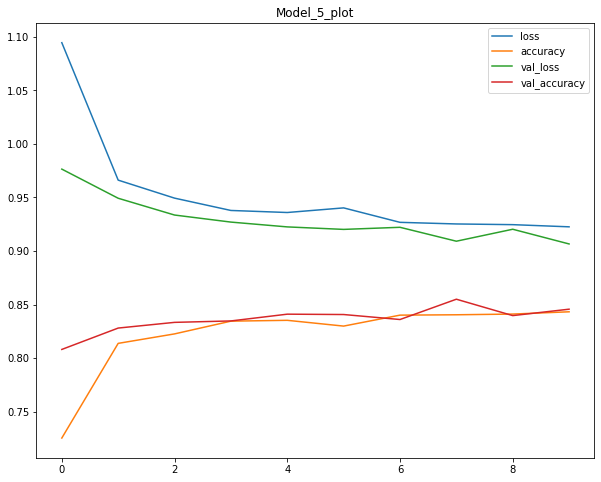

In [109]:
plt.figure(figsize = (10, 8))
plt.plot(model_5_plot)
plt.legend(model_5_plot)
plt.title('Model_5_plot');

In [110]:
model_5_pred = model_5.predict(val_char_pos_datasets)
model_5_pred = tf.argmax(model_5_pred, axis = 1)
model_5_pred[:10]

945/945 [==============================] - 20s 19ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 0, 0, 2, 2, 4, 4, 4, 4, 1])>

In [111]:
# Calculate results of token-char-positional hybrid model
model_5_score= algorithm_score(true_value=val_label_encoder,
                                model_prediction=model_5_pred)
model_5_score

{'Accuracy': 0.848404607440752,
 'F1': 0.8452163345667706,
 'precision': 0.8498105138937839,
 'recall': 0.848404607440752}

In [112]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_model_score,
                                  "custom_token_embed_conv1d": model_1_score,
                                  "pretrained_token_embed": model_2_score,
                                  "custom_char_embed_conv1d": model_3_score,
                                  "hybrid_char_token_embed": model_4_score,
                                  "tribrid_pos_char_token_embed": model_5_score})
all_model_results = all_model_results.transpose()
all_model_results

,Accuracy,F1,precision,recall
baseline,0.716675,0.692510,0.712432,0.716675
custom_token_embed_conv1d,0.809413,0.806218,0.805429,0.809413
pretrained_token_embed,0.699755,0.693855,0.693358,0.699755
custom_char_embed_conv1d,0.461936,0.416098,0.423340,0.461936
hybrid_char_token_embed,0.771382,0.768229,0.771513,0.771382
tribrid_pos_char_token_embed,0.848405,0.845216,0.849811,0.848405


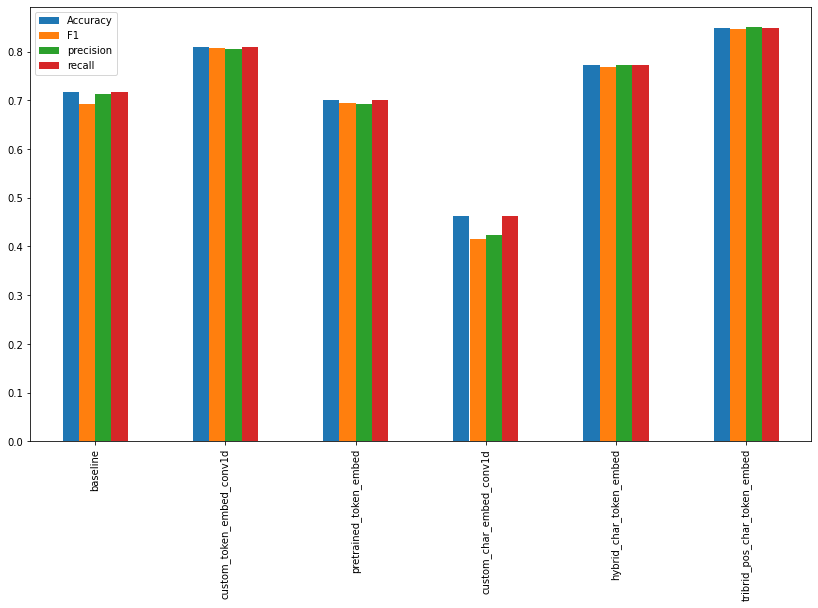

In [113]:
##Visualising Results from Model training.
fig, ax = plt.subplots(figsize = (14, 8))
all_model_results.plot(kind = 'bar', ax = ax);

In [115]:
##Save our best model for the 20k dataset.
model_5.save('best_model/TextVision')

In [116]:
model_5_loaded = tf.keras.models.load_model('best_model/TextVision')

In [117]:
model_5_loaded.evaluate(val_char_pos_datasets)

945/945 [==============================] - 23s 23ms/step - loss: 0.9045 - accuracy: 0.8484


[0.9044687747955322, 0.848404586315155]

In [118]:
## feature engineering the test dataset.
test_char_pos_dataset = tf.data.Dataset.from_tensor_slices((onehot_test_line, onehot_test_total_line,
                                                        test_text, char_test)) #Feature engineering the test_dataset

test_char_pos_label = tf.data.Dataset.from_tensor_slices(test_labels_one_hot) #Make labels
test_char_pos_dataset = tf.data.Dataset.zip((test_char_pos_dataset, test_char_pos_label))
test_char_pos_dataset = test_char_pos_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 

In [119]:
test_char_pos_dataset

<PrefetchDataset element_spec=((TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None, 20), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None, 5), dtype=tf.float64, name=None))>

In [120]:
test_predict_probs = model_5_loaded.predict(test_char_pos_dataset)
test_predict = tf.argmax(test_predict_probs, axis = 1)
test_predict[:10]

942/942 [==============================] - 20s 19ms/step


<tf.Tensor: shape=(10,), dtype=int64, numpy=array([0, 2, 2, 2, 4, 4, 4, 1, 1, 0])>

I imported Tensorhelper a python package I built to make Visualising and accessing deep learning model easier.  https://pypi.org/project/tensorhelper/

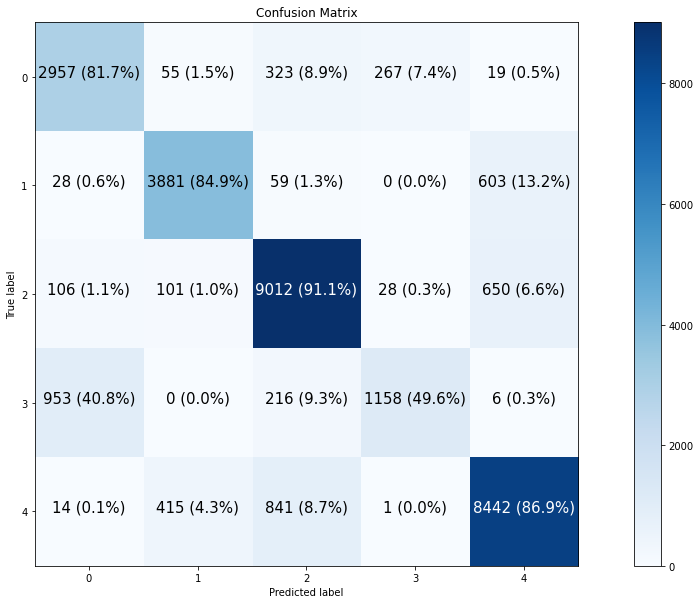

In [121]:
from tensorhelper.custom_tensor import make_confusion_matrix
make_confusion_matrix(test_label_encoder, test_predict, figsize=(20, 10));

In [122]:
## Finding the most wrong prediction with our model
pred_classes = [label_encoder.classes_[pred] for pred in test_predict]
pred_classes[:10]

['BACKGROUND',
 'METHODS',
 'METHODS',
 'METHODS',
 'RESULTS',
 'RESULTS',
 'RESULTS',
 'CONCLUSIONS',
 'CONCLUSIONS',
 'BACKGROUND']

In [123]:
test_df['model_prediction'] = pred_classes
test_df['probability'] = tf.reduce_max(test_predict_probs, axis = 1).numpy()
test_df['True_and_pred_value_check'] = test_df['target'] == test_df['model_prediction']
test_df[:10]

,target,text,line_number,total_line,model_prediction,probability,True_and_pred_value_check
0,BACKGROUND,This study analyzed liver function abnormaliti...,0,8,BACKGROUND,0.368949,True
1,RESULTS,A post hoc analysis was conducted with the use...,1,8,METHODS,0.596941,False
2,RESULTS,Liver function tests ( LFTs ) were measured at...,2,8,METHODS,0.831579,False
3,RESULTS,Survival analyses were used to assess the asso...,3,8,METHODS,0.756805,False
4,RESULTS,The percentage of patients with abnormal LFTs ...,4,8,RESULTS,0.708907,True
5,RESULTS,When mean hemodynamic profiles were compared i...,5,8,RESULTS,0.811820,True
6,RESULTS,Multivariable analyses revealed that patients ...,6,8,RESULTS,0.687873,True
7,CONCLUSIONS,Abnormal LFTs are common in the ADHF populatio...,7,8,CONCLUSIONS,0.586098,True
8,CONCLUSIONS,Elevated MELD-XI scores are associated with po...,8,8,CONCLUSIONS,0.626182,True
9,BACKGROUND,Minimally invasive endovascular aneurysm repai...,0,12,BACKGROUND,0.652169,True


In [124]:
### Visualising the most wrong predictions
test_df_wrong = test_df[test_df['True_and_pred_value_check'] == False]
test_df_wrong.head()

,target,text,line_number,total_line,model_prediction,probability,True_and_pred_value_check
1,RESULTS,A post hoc analysis was conducted with the use...,1,8,METHODS,0.596941,False
2,RESULTS,Liver function tests ( LFTs ) were measured at...,2,8,METHODS,0.831579,False
3,RESULTS,Survival analyses were used to assess the asso...,3,8,METHODS,0.756805,False
10,BACKGROUND,The aim of this study was to analyse the cost-...,1,12,OBJECTIVE,0.436106,False
20,RESULTS,Nor was EVAR superior regarding cost-utility .,11,12,CONCLUSIONS,0.589653,False


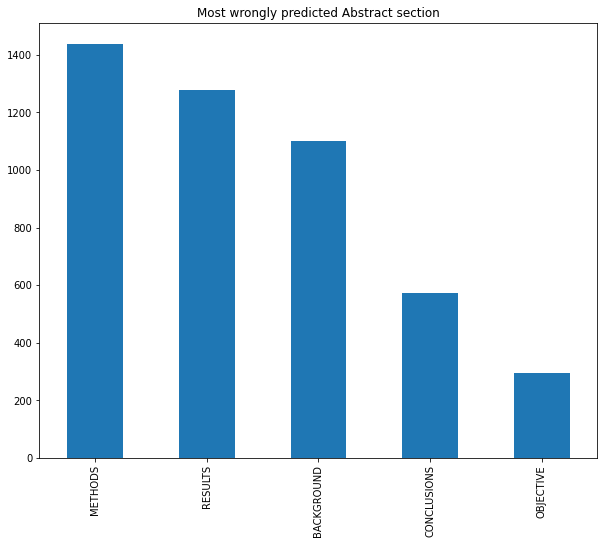

In [125]:
fig, ax = plt.subplots(figsize = (10, 8))
test_df_wrong['model_prediction'].value_counts().plot(kind = 'bar', ax = ax)
ax.set_title('Most wrongly predicted Abstract section');

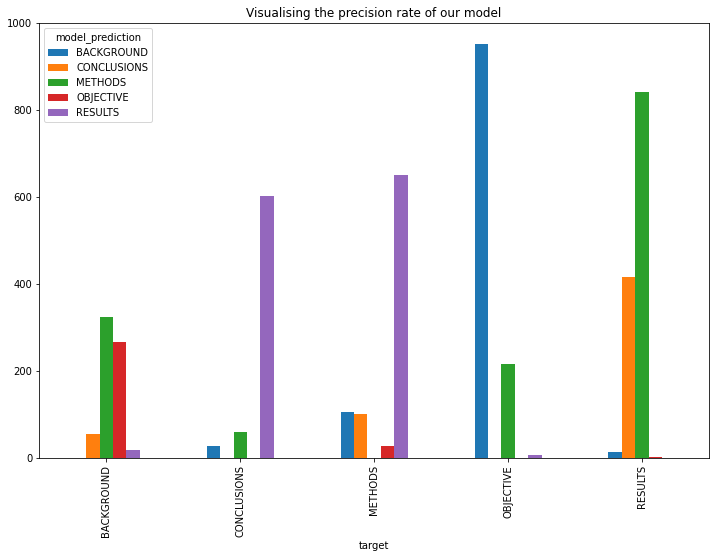

In [126]:
## Comparing wrong predictions against the True Value.
compare_data = pd.crosstab(test_df_wrong['target'], test_df_wrong['model_prediction'])
fig, ax = plt.subplots(figsize = (12, 8))
compare_data.plot(kind = 'bar', ax = ax)
ax.set_title('Visualising the precision rate of our model');

## Predicting on the test dataset

In [127]:
# Investigate top wrong preds
test_df_wrong = test_df_wrong.sample(frac = 1) #Shuffle test dataset

for row in test_df_wrong[0:10].itertuples():
  print(row)

Pandas(Index=29826, target='RESULTS', text='We performed a secondary analysis using the Single Ventricle Reconstruction Trial database after excluding patients < @ weeks gestation ( N = @ ) .', line_number=1, total_line=13, model_prediction='METHODS', probability=0.6060519814491272, True_and_pred_value_check=False)
Pandas(Index=25223, target='OBJECTIVE', text='The efficacy , safety , and tolerability of NNC@-@ , a selective anti-IL-@ recombinant human monoclonal antibody ( mAb ) , were assessed in patients with active RA who had an inadequate response to methotrexate therapy .', line_number=1, total_line=10, model_prediction='BACKGROUND', probability=0.4290115237236023, True_and_pred_value_check=False)
Pandas(Index=12783, target='METHODS', text='Level II , lesser-quality prospective randomized trial .', line_number=13, total_line=13, model_prediction='CONCLUSIONS', probability=0.5192254781723022, True_and_pred_value_check=False)
Pandas(Index=5200, target='METHODS', text='Finally , a UK